# Decision Trees

In [ ]:
#1. Instale y cargue la libreria tree de sklearn, graphviz. También cargue el dataset credit.csv
#Además, convierta a variables categoóricas las siguientes columnas: checking_balance, 
#credit_history, savings_balance, employment_duration, housing, job, phone y default


In [87]:
!pip install graphviz
!pip install sklearn

In [251]:
import graphviz
from sklearn import tree
import pandas as pd
import numpy as np


In [252]:
credit=pd.read_csv('/Users/jorgebohl/Desktop/Martinexsa/Proyectos/Cursos/Bantrab/Data/credit.csv')

In [260]:
credit

checking_balance  months_loan_duration credit_history  \
0             < 0 DM                     6       critical   
1         1 - 200 DM                    48           good   
2            unknown                    12       critical   
3             < 0 DM                    42           good   
4             < 0 DM                    24           poor   
..               ...                   ...            ...   
995          unknown                    12           good   
996           < 0 DM                    30           good   
997          unknown                    12           good   
998           < 0 DM                    45           good   
999       1 - 200 DM                    45       critical   

                  purpose  amount savings_balance employment_duration  \
0    furniture/appliances    1169         unknown           > 7 years   
1    furniture/appliances    5951        < 100 DM         1 - 4 years   
2               education    2096        < 100 DM         4 - 7 years   
3    furniture/appliances    7882        < 100 DM         4 - 7 years   
4                     car    4870        < 100 DM         1 - 4 years   
..                    ...     ...             ...                 ...   
995  furniture/appliances    1736        < 100 DM         4 - 7 years   
996                   car    3857        < 100 DM         1 - 4 years   
997  furniture/appliances     804        < 100 DM           > 7 years   
998  furniture/appliances    1845        < 100 DM         1 - 4 years   
999                   car    4576    100 - 500 DM          unemployed   

     percent_of_income  years_at_residence  age  ... Hother Hown  Hrent  \
0                    4                   4   67  ...      0    1      0   
1                    2                   2   22  ...      0    1      0   
2                    2                   3   49  ...      0    1      0   
3                    2                   4   45  ...      1    0      0   
4                    3                   4   53  ...      1    0      0   
..                 ...                 ...  ...  ...    ...  ...    ...   
995                  3                   4   31  ...      0    1      0   
996                  4                   4   40  ...      0    1      0   
997                  4                   4   38  ...      0    1      0   
998                  4                   4   23  ...      1    0      0   
999                  3                   4   27  ...      0    1      0   

    Jmanagement  Jskilled Junemployed Junskilled  Pno  Pyes  y  
0             0         1           0          0    0     1  0  
1             0         1           0          0    1     0  1  
2             0         0           0          1    1     0  0  
3             0         1           0          0    1     0  0  
4             0         1           0          0    1     0  1  
..          ...       ...         ...        ...  ...   ... ..  
995           0         0           0          1    1     0  0  
996           1         0           0          0    0     1  0  
997           0         1           0          0    1     0  0  
998           0         1           0          0    0     1  1  
999           0         1           0          0    1     0  0  

[1000 rows x 46 columns]

In [255]:
credit.dtypes

checking_balance        object
months_loan_duration     int64
credit_history          object
purpose                 object
amount                   int64
savings_balance         object
employment_duration     object
percent_of_income        int64
years_at_residence       int64
age                      int64
other_credit            object
housing                 object
existing_loans_count     int64
job                     object
dependents               int64
phone                   object
default                 object
dtype: object

In [256]:
credit.describe()

months_loan_duration        amount  percent_of_income  \
count           1000.000000   1000.000000        1000.000000   
mean              20.903000   3271.258000           2.973000   
std               12.058814   2822.736876           1.118715   
min                4.000000    250.000000           1.000000   
25%               12.000000   1365.500000           2.000000   
50%               18.000000   2319.500000           3.000000   
75%               24.000000   3972.250000           4.000000   
max               72.000000  18424.000000           4.000000   

       years_at_residence          age  existing_loans_count   dependents  
count         1000.000000  1000.000000           1000.000000  1000.000000  
mean             2.845000    35.546000              1.407000     1.155000  
std              1.103718    11.375469              0.577654     0.362086  
min              1.000000    19.000000              1.000000     1.000000  
25%              2.000000    27.000000              1.000000     1.000000  
50%              3.000000    33.000000              1.000000     1.000000  
75%              4.000000    42.000000              2.000000     1.000000  
max              4.000000    75.000000              4.000000     2.000000

In [257]:
credit['default'].value_counts()

no     700
yes    300
Name: default, dtype: int64

In [258]:
credit[['CB1_200','CB0','CBmayor200','CBunknown']] = pd.get_dummies(credit["checking_balance"])
credit[['CHcritical','CHgood','CHperfect','CHpoor','CHverygood']] = pd.get_dummies(credit["credit_history"])
credit[['SB100_500','SB500_1000','SBmenor100','SBmayor1000','SBunkown']] = pd.get_dummies(credit["savings_balance"])
credit[['ED1_4','ED4_7','EDmenor1','EDmayor7',"EDunemployed"]] = pd.get_dummies(credit["employment_duration"])
credit[["Hother","Hown","Hrent"]] = pd.get_dummies(credit["housing"])
credit[["Jmanagement","Jskilled","Junemployed","Junskilled"]] = pd.get_dummies(credit["job"])
credit[["Pno","Pyes"]] = pd.get_dummies(credit["phone"])
credit["y"]=np.where(credit["default"]=="no",0,1)

In [261]:
credit.dtypes

checking_balance        object
months_loan_duration     int64
credit_history          object
purpose                 object
amount                   int64
savings_balance         object
employment_duration     object
percent_of_income        int64
years_at_residence       int64
age                      int64
other_credit            object
housing                 object
existing_loans_count     int64
job                     object
dependents               int64
phone                   object
default                 object
CB1_200                  uint8
CB0                      uint8
CBmayor200               uint8
CBunknown                uint8
CHcritical               uint8
CHgood                   uint8
CHperfect                uint8
CHpoor                   uint8
CHverygood               uint8
SB100_500                uint8
SB500_1000               uint8
SBmenor100               uint8
SBmayor1000              uint8
SBunkown                 uint8
ED1_4                    uint8
ED4_7   

In [262]:
#2. Divida la data en training y test con el 80% de la data en training

from sklearn.model_selection import train_test_split

x_credit=credit.drop(['checking_balance','credit_history','purpose','savings_balance','employment_duration',
                  'other_credit','housing','job','phone','default',"y"], axis=1)
y_credit=credit["y"]

x_train,x_test,y_train,y_test=train_test_split(x_credit,y_credit,train_size=0.8,random_state=14)



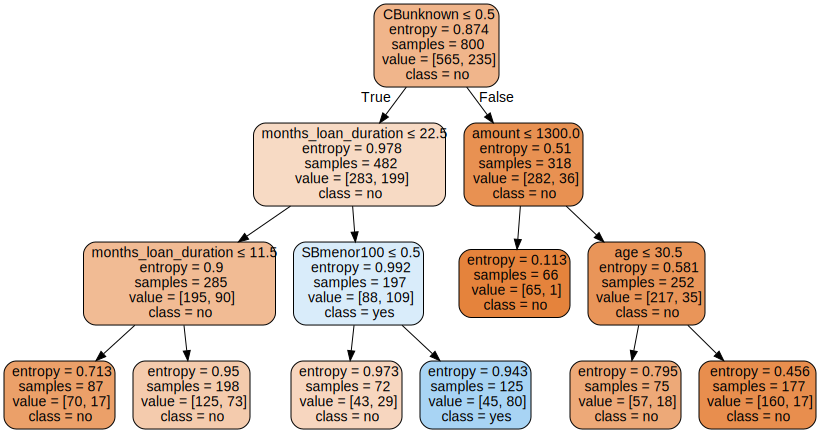

In [268]:
#3. Entrene un arbol de decision y grafiquelo. Para entrenar el modelo ponga los paramoetros min_samples_leafint
#en 50 y max_depth en 3. Luego pruebe modificar el maxdepth a 2 y 4 y grafíquelos para entender la diferencia

clf = tree.DecisionTreeClassifier(criterion="entropy",min_samples_leaf = 50,max_depth=3)
dtree = clf.fit(x_train, y_train)

dot_data = tree.export_graphviz(dtree, out_file=None, 
                                feature_names=x_credit.columns,
                                class_names=["no","yes"],
                                proportion=False,
                                filled=True, rounded=True,
                                special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 


In [269]:
#4. Prediga el test set y saque la matriz de confusión. Obtenga el Recall y Precision de ambas categorias
#¿Por qué le va tan mal prediciendo lo casos "yes"?
from sklearn.metrics import confusion_matrix

predicciones = dtree.predict(x_test)

cm=confusion_matrix(y_true=y_test,y_pred=np.round(predicciones,0))

cm

array([[116,  19],
       [ 41,  24]])

In [270]:
print('recall no:',cm[0,0]/(cm[0,0]+cm[0,1]))
print('recall yes:',cm[1,1]/(cm[1,1]+cm[1,0]))
print('precision no:',cm[0,0]/(cm[0,0]+cm[1,0]))
print('precision yes:',cm[1,1]/(cm[1,1]+cm[0,1]))

recall no: 0.8592592592592593
recall yes: 0.36923076923076925
precision no: 0.7388535031847133
precision yes: 0.5581395348837209


In [174]:
credit

checking_balance  months_loan_duration credit_history  \
0             < 0 DM                     6       critical   
1         1 - 200 DM                    48           good   
2            unknown                    12       critical   
3             < 0 DM                    42           good   
4             < 0 DM                    24           poor   
..               ...                   ...            ...   
995          unknown                    12           good   
996           < 0 DM                    30           good   
997          unknown                    12           good   
998           < 0 DM                    45           good   
999       1 - 200 DM                    45       critical   

                  purpose  amount savings_balance employment_duration  \
0    furniture/appliances    1169         unknown           > 7 years   
1    furniture/appliances    5951        < 100 DM         1 - 4 years   
2               education    2096        < 100 DM         4 - 7 years   
3    furniture/appliances    7882        < 100 DM         4 - 7 years   
4                     car    4870        < 100 DM         1 - 4 years   
..                    ...     ...             ...                 ...   
995  furniture/appliances    1736        < 100 DM         4 - 7 years   
996                   car    3857        < 100 DM         1 - 4 years   
997  furniture/appliances     804        < 100 DM           > 7 years   
998  furniture/appliances    1845        < 100 DM         1 - 4 years   
999                   car    4576    100 - 500 DM          unemployed   

     percent_of_income  years_at_residence  age  ... Hother Hown  Hrent  \
0                    4                   4   67  ...      0    1      0   
1                    2                   2   22  ...      0    1      0   
2                    2                   3   49  ...      0    1      0   
3                    2                   4   45  ...      1    0      0   
4                    3                   4   53  ...      1    0      0   
..                 ...                 ...  ...  ...    ...  ...    ...   
995                  3                   4   31  ...      0    1      0   
996                  4                   4   40  ...      0    1      0   
997                  4                   4   38  ...      0    1      0   
998                  4                   4   23  ...      1    0      0   
999                  3                   4   27  ...      0    1      0   

    Jmanagement  Jskilled Junemployed Junskilled  Pno  Pyes  y  
0             0         1           0          0    0     1  0  
1             0         1           0          0    1     0  1  
2             0         0           0          1    1     0  0  
3             0         1           0          0    1     0  0  
4             0         1           0          0    1     0  1  
..          ...       ...         ...        ...  ...   ... ..  
995           0         0           0          1    1     0  0  
996           1         0           0          0    0     1  0  
997           0         1           0          0    1     0  0  
998           0         1           0          0    0     1  1  
999           0         1           0          0    1     0  0  

[1000 rows x 46 columns]

In [271]:
credit_balanced["default"].value_counts()

no     300
yes    300
Name: default, dtype: int64

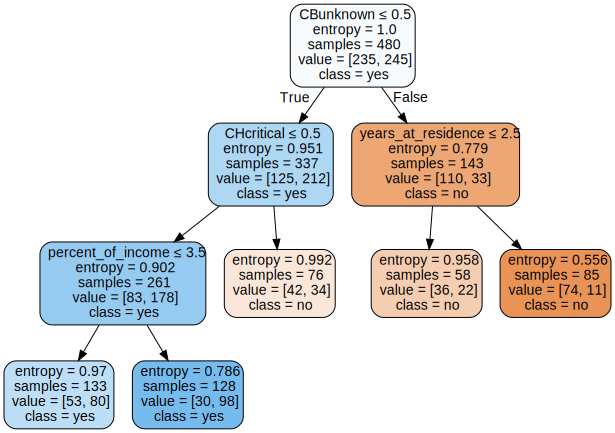

In [274]:
#5. Balancee el dataset, prediga de nuevo el test set y saque una nueva matriz de confusion

num_y=credit["default"].value_counts()

min_num=min(num_y)

min_class=num_y[num_y==min(num_y)].index[0]

undersamp=credit[credit["default"]!=min_class].sample(min_num,random_state=20)

credit_balanced=pd.concat([undersamp,credit[credit["default"]==min_class]],axis=0)

credit_balanced["default"].value_counts()

x_balanced=credit_balanced.drop(['checking_balance','credit_history','purpose','savings_balance','employment_duration',
                  'other_credit','housing','job','phone','default',"y"], axis=1)
y_balanced=credit_balanced["y"]

x_trainB,x_testB,y_trainB,y_testB = train_test_split(x_balanced,y_balanced,train_size=0.8,random_state=14)

clf = tree.DecisionTreeClassifier(criterion="entropy",min_samples_leaf = 50,max_depth=3)
dtree = clf.fit(x_trainB, y_trainB)

dot_data = tree.export_graphviz(dtree, out_file=None, 
                                feature_names=x_credit.columns,
                                class_names=["no","yes"],
                                proportion=False,
                                filled=True, rounded=True,
                                special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 




In [275]:
prediccionesB = dtree.predict(x_test)
cm=confusion_matrix(y_true=y_test,y_pred=np.round(prediccionesB,0))

print(cm)

print('recall no:',cm[0,0]/(cm[0,0]+cm[0,1]))
print('recall yes:',cm[1,1]/(cm[1,1]+cm[1,0]))
print('precision no:',cm[0,0]/(cm[0,0]+cm[1,0]))
print('precision yes:',cm[1,1]/(cm[1,1]+cm[0,1]))

[[88 47]
 [22 43]]
recall no: 0.6518518518518519
recall yes: 0.6615384615384615
precision no: 0.8
precision yes: 0.4777777777777778
